# Procedural program to get and analyze RSS-Newsfeeds

## Libraries and settings

In [65]:
# Libraries
import os
import requests
import pandas as pd
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from requests_html import HTMLSession

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

/Users/mauriceruegg/Documents/ZHAW_lokal/4_Semester/Scientific_Prototyping/scientific_programming/Week_07/challenge


## Functions to get the content of RSS-Feeds

In [66]:
def get_source(url):
    """
    Provides source code of the website of the specified URL.

    :param url: URL of the page to scrape. Type = str
    :return: Response from serrver request. Type = requests_html.HTMLResponse
    """
    try:
        session = HTMLSession()
        response = session.get(url)
        return response
    except requests.exceptions.RequestException as e:
        print(e)

def get_single_feed(url):
    """
    Derives the content of a single RSS-Feed for the provided URL.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    response = get_source(url)
    rows = []

    with response as r:
        items = r.html.find("item", first=False)
        for item in items:
            title = item.find('title', first=True).text
            pubDate = item.find('pubDate', first=True).text
            guid = item.find('guid', first=True).text
            description_element = item.find('description', first=True)
            
            # Check if 'description' element exists before accessing 'text'
            description = description_element.text if description_element is not None else ""
            
            row = {'title': title, 'pubDate': pubDate, 'guid': guid, 'description': description}
            rows.append(row)

    df = pd.DataFrame(rows)
    return df

def get_multiple_feeds(url_list):
    """
    Derives the content on RSS-Feed for the provided list of URLs.

    :param url: URL of the page to scrape. Type = str
    :return: HTTP response object from requests_html. Type = pandas.DataFrame
    """
    
    df = pd.DataFrame(columns = ['title', 'pubDate', 'guid', 'description'])

    for url in url_list:

        df_iter = get_single_feed(url)
        df = pd.concat([df, df_iter], ignore_index=True)

    return df


## Getting infos from single RSS-Feed

In [67]:
# Call functions for single feed
df_feed = get_single_feed('https://www.nzz.ch/international.rss')
df_feed.head(10)

,title,pubDate,guid,description
0,Die israelische Armee zieht sämtliche Bodentru...,"Sun, 07 Apr 2024 14:30:00 GMT",ld.1825291,Nur eine Brigade bleibt in der Region zurück. ...
1,Warum schliessen sich junge Nigerianer der Ter...,"Sun, 07 Apr 2024 14:31:54 GMT",ld.1823165,Seit mehr als fünfzehn Jahren terrorisieren Bo...
2,"«Trump ist ein wahrer Bösewicht, und Biden ist...","Sun, 07 Apr 2024 03:30:00 GMT",ld.1822211,Der Sinologe Cheng Chaoting gewährt erstaunlic...
3,US-Präsidentschaftswahl: Ein Kennedy könnte zu...,"Sun, 07 Apr 2024 09:30:00 GMT",ld.1825153,Die Bewegung «No Labels» wollte einen gemässig...
4,Mehrere Fälle von brutaler Jugendgewalt schock...,"Sun, 07 Apr 2024 07:37:00 GMT",ld.1825282,Drei Vermummte lauern einem 15-Jährigen auf un...
5,"Schwere Verluste bei Leopard-Panzern, hohe Tre...","Sun, 07 Apr 2024 03:30:00 GMT",ld.1825093,Vor gut einem Jahr lieferte Deutschland nach m...
6,Ehepaar Nawalny erhält Freiheitspreis der Medi...,"Sun, 07 Apr 2024 03:19:30 GMT",ld.1825281,Nach dem Tod von Alexei Nawalny ist Julia Nawa...
7,Peter Pellegrini gewinnt die Präsidentenwahl i...,"Sun, 07 Apr 2024 00:08:20 GMT",ld.1825166,Die Bevölkerung der Slowakei entscheidet sich ...
8,Ein Hobby-Rapper und Kleinkrimineller verhilft...,"Fri, 05 Apr 2024 14:40:16 GMT",ld.1825081,"Audrey Mondjehis Leben bestand aus Rap, Gelege..."
9,Dänemarks Armee blamiert sich mit einer Pannen...,"Fri, 05 Apr 2024 14:42:57 GMT",ld.1825017,Nach einem missglückten Marineeinsatz im Roten...


## Getting infos from multiple RSS-Feeds

In [68]:
# List with RSS-Feeds (germ. and engl.)

url_list = ['https://www.spiegel.de/schlagzeilen/index.rss',
            'https://www.nzz.ch/international.rss',
            'https://rss.nytimes.com/services/xml/rss/nyt/Europe.xml',
            'https://rss.nytimes.com/services/xml/rss/nyt/World.xml']

# Function call
df_multi_feeds = get_multiple_feeds(url_list)
df_multi_feeds.head(10)

,title,pubDate,guid,description
0,Peter Sodann: Nachruf auf den Theatermann und ...,"Sun, 7 Apr 2024 16:45:00 +0200",https://www.spiegel.de/kultur/peter-sodann-nac...,"Schauspieldirektor, »Tatort«-Kommissar, Bundes..."
1,Frankreich: Kaninchenplage in Baillargues – Bü...,"Sun, 7 Apr 2024 16:45:00 +0200",https://www.spiegel.de/panorama/frankreich-kan...,Weil sich Kaninchen in einer südfranzösischen ...
2,Netflix: »Scoop – ein royales Interview« über ...,"Sun, 7 Apr 2024 16:31:00 +0200",https://www.spiegel.de/kultur/tv/netflix-scoop...,"Ein Prinz, der nicht schwitzen kann, ein weibl..."
3,Hamas-Massaker vom 7. Oktober: Wie ein Filmema...,"Sun, 7 Apr 2024 16:03:00 +0200",https://www.spiegel.de/ausland/hamas-massaker-...,Mattan Harel-Fish hatte nach dem Massaker vom ...
4,Warum Markus Söder als Kanzler ein Unglück wäre,"Sun, 7 Apr 2024 15:55:00 +0200",https://www.spiegel.de/politik/warum-markus-so...,Kaum ein Politiker lässt sich so von Stimmunge...
5,2. Fußball-Bundesliga: Düsseldorf verdrängt de...,"Sun, 7 Apr 2024 15:41:00 +0200",https://www.spiegel.de/sport/fussball/2-fussba...,Die abstiegsbedrohten Schalker gaben gegen Han...
6,Kinding bei Eichstätt: Lkw-Fahrer fährt über F...,"Sun, 7 Apr 2024 15:23:00 +0200",https://www.spiegel.de/panorama/kinding-bei-ei...,"Die Umleitung schien ihm zu lang, also lenkte ..."
7,"Bauernprotest, Fußballprotest, Klimaprotest: »...","Sun, 7 Apr 2024 14:35:00 +0200",https://www.spiegel.de/politik/deutschland/bau...,"Für die einen sind sie Störenfriede, für die a..."
8,A111 in Berlin: Quadfahrer stirbt bei mutmaßli...,"Sun, 7 Apr 2024 14:34:00 +0200",https://www.spiegel.de/panorama/justiz/a111-in...,Ein 45-Jähriger soll sich in Berlin mit einem ...
9,Verkehrsunfall im Trainingslager: Radprofi Len...,"Sun, 7 Apr 2024 14:32:00 +0200",https://www.spiegel.de/sport/verkehrsunfall-im...,Der deutsche Radprofi Lennard Kämna befindet s...


## Finding the k most frequent words per RSS-Feed title

In [69]:
for item in df_multi_feeds['title']:

    from collections import Counter
    
    split_txt = item.split()
    Counter = Counter(split_txt)
    most_occur = Counter.most_common(5)
    print(most_occur)

[('Peter', 1), ('Sodann:', 1), ('Nachruf', 1), ('auf', 1), ('den', 1)]
[('Frankreich:', 1), ('Kaninchenplage', 1), ('in', 1), ('Baillargues', 1), ('–', 1)]
[('Netflix:', 1), ('»Scoop', 1), ('–', 1), ('ein', 1), ('royales', 1)]
[('Hamas-Massaker', 1), ('vom', 1), ('7.', 1), ('Oktober:', 1), ('Wie', 1)]
[('Warum', 1), ('Markus', 1), ('Söder', 1), ('als', 1), ('Kanzler', 1)]
[('2.', 1), ('Fußball-Bundesliga:', 1), ('Düsseldorf', 1), ('verdrängt', 1), ('den', 1)]
[('Kinding', 1), ('bei', 1), ('Eichstätt:', 1), ('Lkw-Fahrer', 1), ('fährt', 1)]
[('Bauernprotest,', 1), ('Fußballprotest,', 1), ('Klimaprotest:', 1), ('»Klaut', 1), ('unsere', 1)]
[('A111', 1), ('in', 1), ('Berlin:', 1), ('Quadfahrer', 1), ('stirbt', 1)]
[('Verkehrsunfall', 1), ('im', 1), ('Trainingslager:', 1), ('Radprofi', 1), ('Lennard', 1)]
[('Iran', 1), ('nennt', 1), ('Israels', 1), ('Botschaften', 1), ('»nicht', 1)]
[('Antilopen', 1), ('Gang:', 1), ('Deutsche', 1), ('Hip-Hop-Band', 1), ('prangert', 1)]
[('Russland', 1), ('-

## Create a wordcloud with the most frequent words in RSS-Feed titles

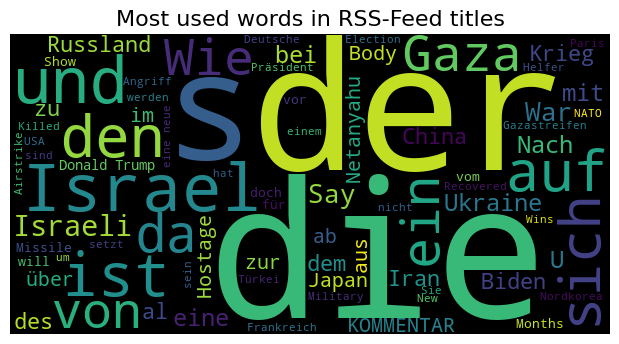

In [70]:
# Wordcloud function
def wordCloud_generator(data, title=None):
    """
    Creates a plot of a word cloud based on the given data

    :param data: input data. Type = str
    :param title: plot title. Type

    """
    wordcloud = WordCloud(height=300,
                          width=600,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    
    # Plot the WordCloud image                        
    plt.figure(figsize = (6, 4), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=16)
    plt.show()
    
# Create Wordcloud
wordCloud_generator(df_multi_feeds['title'], 
                    title="Most used words in RSS-Feed titles")

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [71]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Darwin | 23.2.0
Datetime: 2024-04-07 17:24:12
Python Version: 3.10.13
-----------------------------------
